<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,40.408879,91.751331,4513.927679,4656.087889,-2258.549943,6914.637833
1,0.0,1.0,47.462781,41.442749,1228.522035,1327.427566,-133.081064,1460.508630
2,0.0,2.0,39.329243,68.251668,-4778.446673,-4660.865763,-1349.634853,-3311.230909
3,0.0,3.0,26.897781,38.877686,1163.800779,1239.576246,-426.088544,1665.664790
4,0.0,4.0,56.296051,34.924581,-1353.877900,-1252.657267,294.211885,-1546.869152
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,21.103743,78.618783,-14687.502719,-14577.780192,-208.665569,-14369.114623
249996,999.0,246.0,36.912995,63.798601,1078.821547,1189.533143,-41.980035,1231.513177
249997,999.0,247.0,71.429212,23.723388,-134.305847,-29.153247,351.811889,-380.965136
249998,999.0,248.0,24.851496,66.310365,2175.814667,2276.976527,-135.115634,2412.092162


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2             e             Y        y_hat  \
rep   index                                                                  
0.0   0.0    40.408879  91.751331   4513.927679   4656.087889 -2258.549943   
      1.0    47.462781  41.442749   1228.522035   1327.427566  -133.081064   
      2.0    39.329243  68.251668  -4778.446673  -4660.865763 -1349.634853   
      3.0    26.897781  38.877686   1163.800779   1239.576246  -426.088544   
      4.0    56.296051  34.924581  -1353.877900  -1252.657267   294.211885   
...                ...        ...           ...           ...          ...   
999.0 245.0  21.103743  78.618783 -14687.502719 -14577.780192  -208.665569   
      246.0  36.912995  63.798601   1078.821547   1189.533143   -41.980035   
      247.0  71.429212  23.723388   -134.305847    -29.153247   351.811889   
      248.0  24.851496  66.310365   2175.814667   2276.976527  -135.115634   
      249.0  68.304071  39.025747  -1863.282491  -1745.952673   270.981922   

                    e_hat  
rep   index                
0.0   0.0     6914.637833  
      1.0     1460.508630  
      2.0    -3311.230909  
      3.0     1665.664790  
      4.0    -1546.869152  
...                   ...  
999.0 245.0 -14369.114623  
      246.0   1231.513177  
      247.0   -380.965136  
      248.0   2412.092162  
      249.0  -2016.934595  

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2             e             Y        y_hat  \
rep   index                                                                  
0.0   0.0    40.408879  91.751331   4513.927679   4656.087889 -2258.549943   
      1.0    47.462781  41.442749   1228.522035   1327.427566  -133.081064   
      2.0    39.329243  68.251668  -4778.446673  -4660.865763 -1349.634853   
      3.0    26.897781  38.877686   1163.800779   1239.576246  -426.088544   
      4.0    56.296051  34.924581  -1353.877900  -1252.657267   294.211885   
...                ...        ...           ...           ...          ...   
999.0 245.0  21.103743  78.618783 -14687.502719 -14577.780192  -208.665569   
      246.0  36.912995  63.798601   1078.821547   1189.533143   -41.980035   
      247.0  71.429212  23.723388   -134.305847    -29.153247   351.811889   
      248.0  24.851496  66.310365   2175.814667   2276.976527  -135.115634   
      249.0  68.304071  39.025747  -1863.282491  -1745.952673   270.981922   

                    e_hat  
rep   index                
0.0   0.0     6914.637833  
      1.0     1460.508630  
      2.0    -3311.230909  
      3.0     1665.664790  
      4.0    -1546.869152  
...                   ...  
999.0 245.0 -14369.114623  
      246.0   1231.513177  
      247.0   -380.965136  
      248.0   2412.092162  
      249.0  -2016.934595  

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,40.408879,91.751331,4513.927679,4656.087889,-2258.549943,6914.637833
1,0.0,1.0,47.462781,41.442749,1228.522035,1327.427566,-133.081064,1460.508630
2,0.0,2.0,39.329243,68.251668,-4778.446673,-4660.865763,-1349.634853,-3311.230909
3,0.0,3.0,26.897781,38.877686,1163.800779,1239.576246,-426.088544,1665.664790
4,0.0,4.0,56.296051,34.924581,-1353.877900,-1252.657267,294.211885,-1546.869152
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,21.103743,78.618783,-14687.502719,-14577.780192,-208.665569,-14369.114623
249996,999.0,246.0,36.912995,63.798601,1078.821547,1189.533143,-41.980035,1231.513177
249997,999.0,247.0,71.429212,23.723388,-134.305847,-29.153247,351.811889,-380.965136
249998,999.0,248.0,24.851496,66.310365,2175.814667,2276.976527,-135.115634,2412.092162


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2             e             Y        y_hat  \
rep   index                                                                  
0.0   0.0    40.408879  91.751331   4513.927679   4656.087889 -2258.549943   
      1.0    47.462781  41.442749   1228.522035   1327.427566  -133.081064   
      2.0    39.329243  68.251668  -4778.446673  -4660.865763 -1349.634853   
      3.0    26.897781  38.877686   1163.800779   1239.576246  -426.088544   
      4.0    56.296051  34.924581  -1353.877900  -1252.657267   294.211885   
...                ...        ...           ...           ...          ...   
999.0 245.0  21.103743  78.618783 -14687.502719 -14577.780192  -208.665569   
      246.0  36.912995  63.798601   1078.821547   1189.533143   -41.980035   
      247.0  71.429212  23.723388   -134.305847    -29.153247   351.811889   
      248.0  24.851496  66.310365   2175.814667   2276.976527  -135.115634   
      249.0  68.304071  39.025747  -1863.282491  -1745.952673   270.981922   

                    e_hat  
rep   index                
0.0   0.0     6914.637833  
      1.0     1460.508630  
      2.0    -3311.230909  
      3.0     1665.664790  
      4.0    -1546.869152  
...                   ...  
999.0 245.0 -14369.114623  
      246.0   1231.513177  
      247.0   -380.965136  
      248.0   2412.092162  
      249.0  -2016.934595  

[250000 rows x 6 columns]

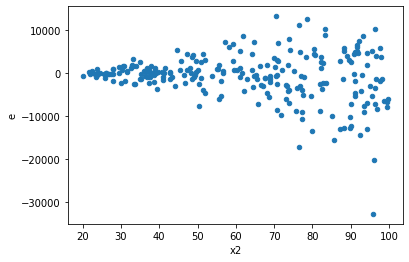

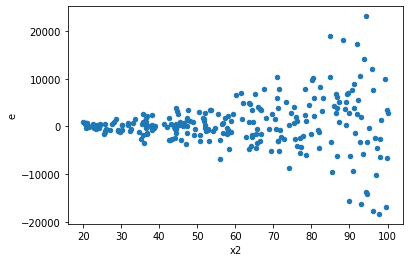

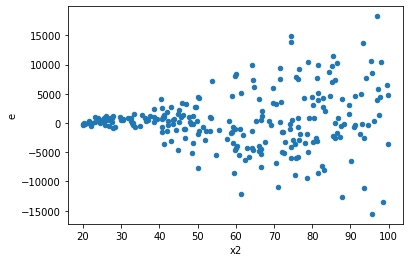

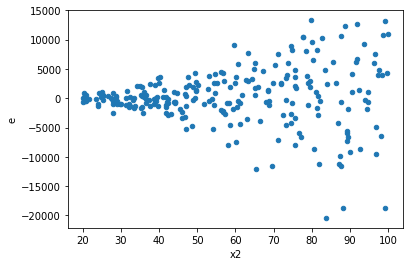

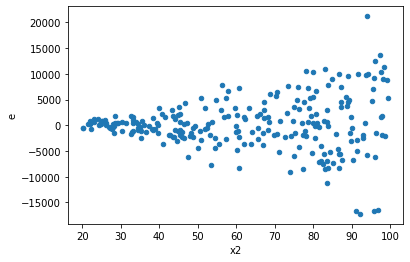

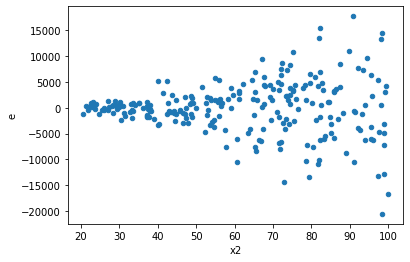

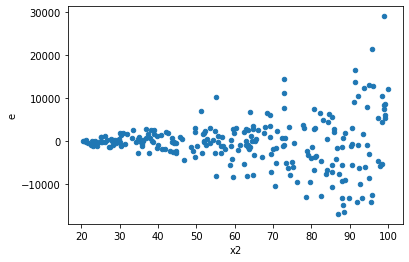

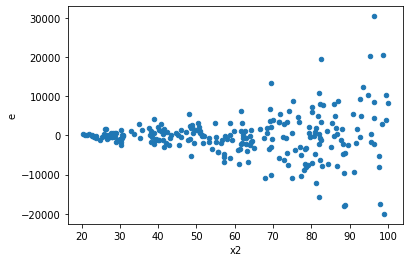

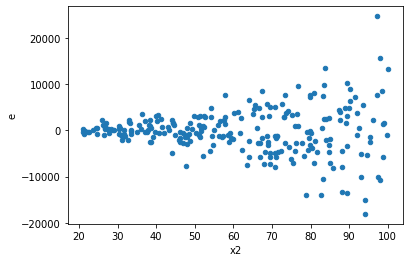

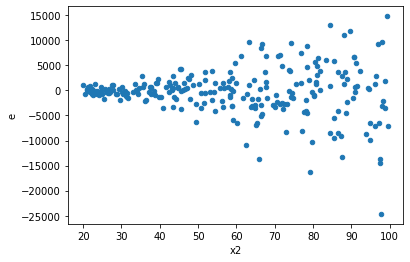

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,140.0,106.0,1305990516.1342127,5540521283.000146,9328503.686672948,52269068.707548544,5.603156783035001,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
10.0,93.0,153.0,1679757031.0994368,5302978644.223264,18061903.560209,34659991.13871414,1.918955608592181,0.0003480062227791958,0.9998259968886104,0.0001740031113895979,Reject005=0 : Heteroscedasticity
12.0,123.0,123.0,574641487.6831391,4561553219.363129,4671882.013684058,37085798.53140755,7.9380854274106945,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
14.0,119.0,127.0,1089495682.4204319,5249367786.766313,9155425.902692705,41333604.62020718,4.514656670210234,8.881784197001252e-16,0.9999999999999996,4.440892098500626e-16,Reject005=0 : Heteroscedasticity
15.0,118.0,128.0,588328160.848715,7006767525.959185,4985831.871599279,54740371.29655613,10.97918516032859,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
17.0,129.0,117.0,621519519.9263461,5398154997.157679,4817980.774622838,46138076.89878358,9.576226858729084,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
18.0,128.0,118.0,596713422.6008275,3858635806.389854,4661823.6140689645,32700303.44398181,7.014487494828255,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
19.0,113.0,133.0,2226326019.911714,2948301103.6533813,19702000.17620986,22167677.471078057,1.1251485774447154,0.5117336580845411,0.7441331709577295,0.25586682904227054,Reject005=1 : Homoscedasticity
22.0,137.0,109.0,812177530.6397569,6283894973.283425,5928303.14335589,57650412.59893051,9.724606047439032,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,140.0,106.0,1305990516.1342127,5540521283.000146,9328503.686672948,52269068.707548544,5.603156783035001,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
1.0,130.0,116.0,4342056034.796914,2299164753.0080175,33400431.03689934,19820385.801793255,0.5934170663814655,0.003917770721286266,Reject005=0 : Heteroscedasticity
2.0,119.0,127.0,4603849712.384186,1029189298.2237164,38687812.709110804,8103852.741919027,0.20946784463755963,2.489521145692637e-16,Reject005=0 : Heteroscedasticity
3.0,125.0,121.0,5611103016.211304,450350138.5386275,44888824.12969043,3721901.971393616,0.08291377739458028,7.038290972233695e-36,Reject005=0 : Heteroscedasticity
4.0,141.0,105.0,5486853426.4704685,710866557.0442284,38913854.08844304,6770157.686135509,0.1739780817070537,4.793464600072712e-21,Reject005=0 : Heteroscedasticity
5.0,127.0,119.0,4028837885.9751306,2372360492.602444,31723132.960434098,19935802.45884407,0.6284310721676989,0.010279068525282636,Reject005=0 : Heteroscedasticity
6.0,126.0,120.0,5205120197.340292,3189354767.9855247,41310477.756668985,26577956.399879374,0.6433708309168306,0.014851325841905403,Reject005=0 : Heteroscedasticity
7.0,133.0,113.0,7359210042.6403475,388300338.6483612,55332406.33564171,3436286.18272886,0.062102597922176705,2.55813167466082e-44,Reject005=0 : Heteroscedasticity
8.0,125.0,121.0,3088029273.0444427,2843837481.6785874,24704234.184355542,23502789.104781713,0.9513668357169853,0.7818828014443872,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    836
Reject005=1 : Homoscedasticity      164
Name: Result_test, dtype: int64